# House Price Predictor

Machine learning model to predict the house price using linear regression.
---
Numerous datasets are available for the purpose of predicting house prices. In the context of this analysis, the dataset employed has been sourced from a Kaggle competition. [Link](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download)

In [1]:
# Load the dataset
import pandas as pd
data = pd.read_csv("Dataset/Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Data Preprocessing

In [2]:
# To convert categorical columns containing "yes" and "no" values into binary numerical representations (0 and 1)
def convertYesNo(value):
    if value == 'yes':
        return 1
    else: 
        return 0
    
# only for furnishingstatus coloumn     
def furnishingstatus(val):
    if val == 'unfurnished':
        return 0
    if val == 'semi-furnished':
        return 1
    else:
        return 2
    
data['mainroad'] = data['mainroad'].apply(convertYesNo)
data['guestroom'] = data['guestroom'].apply(convertYesNo)
data['basement'] = data['basement'].apply(convertYesNo)
data['hotwaterheating'] = data['hotwaterheating'].apply(convertYesNo)
data['airconditioning'] = data['airconditioning'].apply(convertYesNo)
data['prefarea'] = data['prefarea'].apply(convertYesNo)
data['furnishingstatus'] = data['furnishingstatus'].apply(furnishingstatus)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


##### Quantile Outlier Detection

In [3]:
q1 = data['price'].quantile(0.25) # value below which 25% of the data falls
q2 = data['price'].quantile(0.75) # value below which 75% of the data falls
ior = q2-q1 # values range between 5% and 25% 
ior, q1, q2

(2310000.0, 3430000.0, 5740000.0)

In [4]:
upperBound = q2+1.5*ior
lowerBound = q1-1.5*ior
data = data[(data['price'] <= upperBound) & (data['price'] >=  lowerBound)]
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,2
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [5]:
q1_area = data['area'].quantile(0.25)
q2_area = data['area'].quantile(0.75)
ior_area = q2_area - q1_area
ior_area, q1_area, q2_area

(2768.25, 3547.5, 6315.75)

In [6]:
ub_area = q2_area+1.5*ior_area
lb_area = q1_area-1.5*ior_area
data = data[(data['area'] <= ub_area) & (data['price'] >= lb_area)]
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,2
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


##### Divide the data into X (features) and Y (target)

In [7]:
# Split the dataset into features and target(price)
features = data.drop('price', axis=1)
target = data['price']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)
# target = scaler.fit_transform(target)

In [9]:
# split the data into training and testing set
from sklearn.model_selection import train_test_split as tts
feature_train, feature_test, target_train, target_test = tts(features, target, test_size=0.2, random_state=42)

##### Features data

In [10]:
feature_train,feature_test

(array([[-1.33343058,  2.81538629,  1.58926802, ...,  0.41092243,
         -0.52587376,  1.44054864],
        [-0.38825716,  0.07938119, -0.56165231, ...,  0.41092243,
         -0.52587376,  1.44054864],
        [ 1.18703186,  0.07938119, -0.56165231, ...,  2.78463078,
         -0.52587376,  1.44054864],
        ...,
        [-0.70331497,  0.07938119,  1.58926802, ..., -0.77593174,
         -0.52587376, -1.19578286],
        [-1.01274674, -1.28862136, -0.56165231, ..., -0.77593174,
         -0.52587376, -1.19578286],
        [ 0.76732986,  1.44738374,  1.58926802, ...,  0.41092243,
          1.90159707,  0.12238289]]),
 array([[ 1.3333087 ,  0.07938119,  1.58926802, ...,  2.78463078,
         -0.52587376,  1.44054864],
        [-0.51765591,  0.07938119, -0.56165231, ..., -0.77593174,
         -0.52587376, -1.19578286],
        [-0.16321587, -1.28862136, -0.56165231, ..., -0.77593174,
         -0.52587376,  1.44054864],
        ...,
        [-1.79476523,  0.07938119, -0.56165231, ..., -

##### Target data

In [11]:
target_train, target_test

(356    3773000
 199    4907000
 299    4200000
 525    2345000
 208    4900000
         ...   
 91     6419000
 127    5880000
 297    4200000
 463    3080000
 122    5950000
 Name: price, Length: 413, dtype: int64,
 331    3920000
 529    2275000
 469    3010000
 177    5243000
 531    2233000
         ...   
 193    5033000
 302    4200000
 537    1890000
 541    1767150
 347    3836000
 Name: price, Length: 104, dtype: int64)

### Model

In [12]:
from sklearn import linear_model
reg_model = linear_model.LinearRegression()

In [13]:
reg_model.fit(feature_train, target_train)

LinearRegression()

#### Formula
**Linear Equation:** _y = m1*(x1) + m2*(x2) + ... + mn*(xn) + c_

Where,
- **y**: Dependent variable
- **x1, x2, ..., xn**: Independent variables
- **m1, m2, ..., mn**: Slopes/Gradients/Coefficients
- **c**: Intercept

In [14]:
# Coefficients
reg_model.coef_

array([438446.01208337,  77244.52071909, 329434.45125381, 395827.68586076,
       136675.345682  , 156446.45958216, 152732.00380358, 144456.4970751 ,
       395197.62600041, 185970.85648239, 208002.79574268, 108811.66313291])

In [15]:
# Intercept
reg_model.intercept_

4558242.052774623

### Predict and Evaluate

In [16]:
import numpy as np
pricePrediction = reg_model.predict(feature_test)
pricePrediction = np.round(pricePrediction)
pricePrediction

array([6183171., 3762909., 3320543., 4466398., 4289425., 5772191.,
       3718634., 3401468., 3778525., 4302733., 2948527., 3152444.,
       4890070., 6033231., 7709755., 2930440., 6618455., 6108963.,
       4923573., 5922251., 6029598., 4443294., 4145808., 5493264.,
       5137722., 5323578., 5558230., 2954346., 3073872., 4280370.,
       3224414., 3405760., 6568921., 6926576., 6823371., 3116264.,
       2859726., 4580272., 6472274., 4043728., 4530086., 6365298.,
       4540475., 5003431., 3406948., 4421563., 6038872., 2869396.,
       2992108., 4305663., 5452550., 3821367., 3575439., 6566902.,
       2255113., 4695766., 7768452., 3717634., 3049757., 6339006.,
       3348497., 4263907., 4929610., 7073329., 2855724., 3929019.,
       4773618., 4428998., 5122008., 4954194., 7801888., 4030074.,
       7997459., 6204180., 4142279., 6481074., 5741224., 3217161.,
       2762341., 6300721., 3600452., 3823305., 3133666., 5085111.,
       6280786., 3268344., 6180048., 2911984., 5166315., 38463

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(target_test, pricePrediction)
rmse = mse**0.5
rmse

988769.3481102678

In [18]:
from sklearn.metrics import r2_score
r2Score = r2_score(target_test, pricePrediction)
accuracy = r2Score*100
accuracy

66.67603480125675

### Visualization

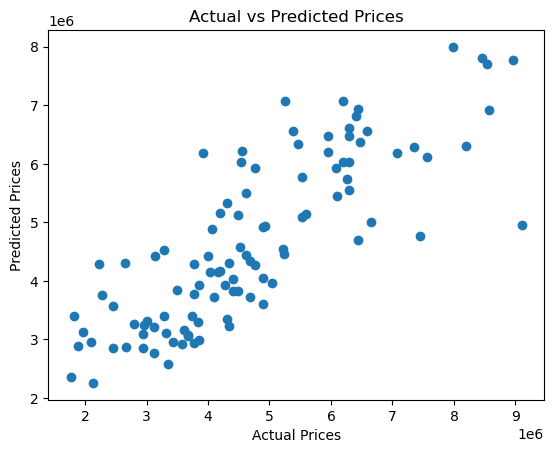

In [19]:
import matplotlib.pyplot as plt

plt.scatter(target_test, pricePrediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()